In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [91]:
Data = pd.read_csv("Netflix Dataset.csv")

In [92]:
Data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [93]:
Data.shape

(7789, 11)

In [94]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
Show_Id         7789 non-null object
Category        7789 non-null object
Title           7789 non-null object
Director        5401 non-null object
Cast            7071 non-null object
Country         7282 non-null object
Release_Date    7779 non-null object
Rating          7782 non-null object
Duration        7789 non-null object
Type            7789 non-null object
Description     7789 non-null object
dtypes: object(11)
memory usage: 669.5+ KB


In [95]:
Data.describe(include="all")

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [96]:
Data.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [97]:
# Data Cleaning

In [98]:
Data[Data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [99]:
Data.drop_duplicates()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [100]:
Data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

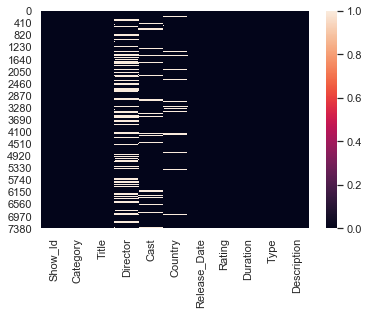

In [101]:
sns.heatmap(Data.isnull())

In [102]:
Data['Director']=Data['Director'].fillna(0)
Data['Cast']=Data['Cast'].fillna(0)
Data['Country']=Data['Country'].fillna(0)
Data['Release_Date']=Data['Release_Date'].fillna(0)
Data['Rating']=Data['Rating'].fillna(0)

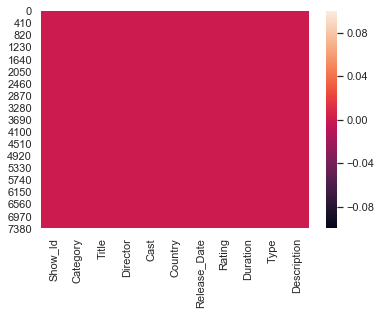

In [103]:
sns.heatmap(Data.isnull())

In [104]:
#Number of TV Shows and Movies Till Now Released

In [105]:
#Creating New Column
Data['Release Date']=pd.to_datetime(Data['Release_Date'])
Data['Year']=Data['Release Date'].dt.year

In [106]:
Data.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release Date,Year
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020


In [107]:
Year=Data['Release Date'].dt.year.value_counts().sort_values(ascending=False)
Year

2019    2154
2020    2010
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
1970      10
2012       3
2008       2
2009       2
2010       1
Name: Release Date, dtype: int64

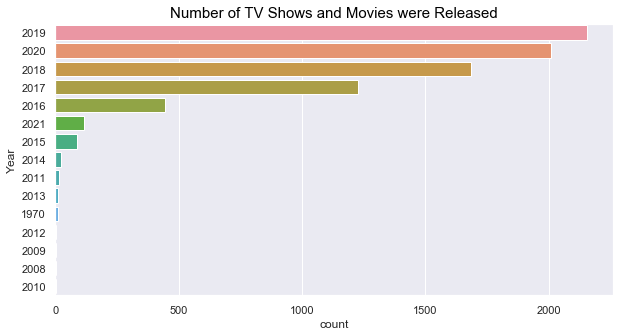

In [108]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="Year", data=Data, order=Data['Year'].value_counts().index[0:15])
plt.title("Number of TV Shows and Movies were Released",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

In [109]:
# TV Shows and Movies Released by Category

In [110]:
Data.groupby('Category').Category.count()

Category
Movie      5379
TV Show    2410
Name: Category, dtype: int64

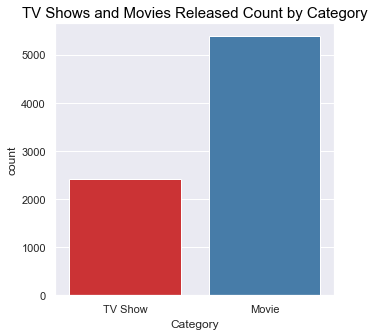

In [174]:
plt.figure(figsize=(5,5))
sns.countplot(x='Category',data=Data,palette='Set1')
plt.title("TV Shows and Movies Released Count by Category",size=15,color='black')
sns.set_style('darkgrid')
plt.show()

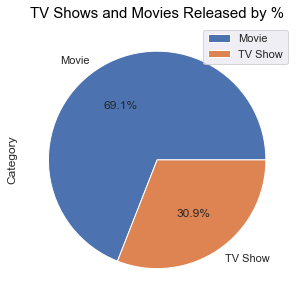

In [168]:
Data['Category'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,5))
plt.title("TV Shows and Movies Released by %",size=15,color='black')
plt.legend(bbox_to_anchor=(1,1),loc=1)
sns.set_style('darkgrid')
plt.show()

In [142]:
#Netflix Rating

In [114]:
Data['Rating'].nunique()

15

In [115]:
Data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 0,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

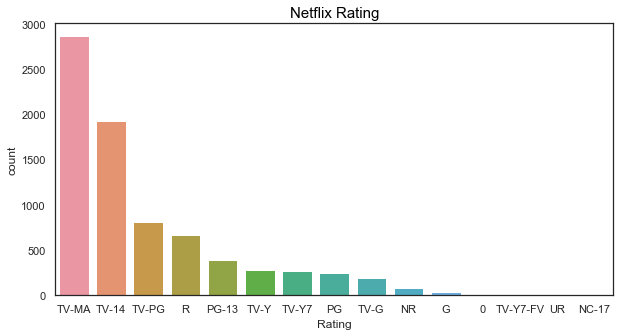

In [116]:
plt.figure(figsize=(10,5))
sns.set(style="white")
ax = sns.countplot(x="Rating", data=Data, order=Data['Rating'].value_counts().index[0:15])
plt.title("Netflix Rating",size=15,color='black')
plt.show()

In [117]:
#Finding Each Category with Rating

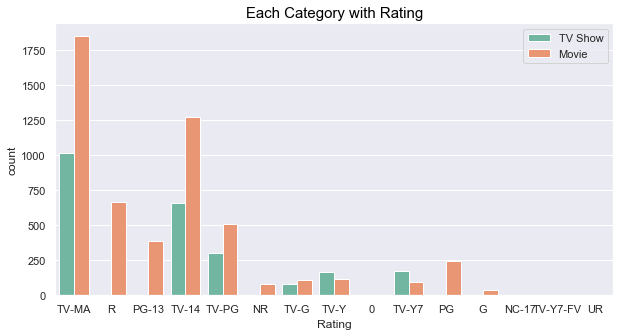

In [147]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating',hue='Category',data=Data,palette='Set2')
plt.title('Each Category with Rating',size=15,color='black')
plt.legend(bbox_to_anchor=(1,1),loc=1)
plt.show()

In [119]:
#Duration of Movies and TV Shows

In [120]:
Data['Duration'].nunique()

216

In [121]:
Data['Duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [122]:
#Converting Object Dtyp into Numeric

In [123]:
Data[['Minutes','Unit']]= Data['Duration'].str.split(' ',expand=True)

In [124]:
Data.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release Date,Year,Minutes,Unit
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020,4,Seasons


In [125]:
Data.Minutes= Data.Minutes.astype(int) 

In [126]:
Top10=Data.nlargest(10,"Minutes")[["Minutes","Unit","Title"]]
Top10
Top10.set_index("Title")

,Minutes,Unit
Title,,
Black Mirror: Bandersnatch,312,min
The School of Mischief,253,min
No Longer kids,237,min
Lock Your Girls In,233,min
Raya and Sakina,230,min
Sangam,228,min
Lagaan,224,min
Jodhaa Akbar,214,min
Kabhi Khushi Kabhie Gham,209,min


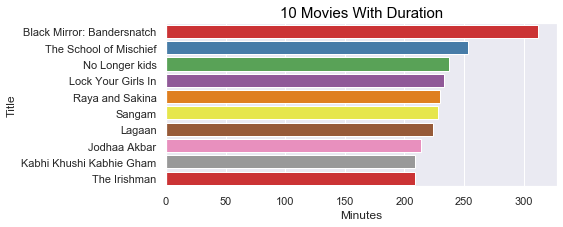

In [163]:
plt.figure(figsize=(7,3))
sns.barplot(x="Minutes",y='Title',data=Top10,palette='Set1')
plt.title("10 Movies With Duration",size=15,color='black')
plt.show()

In [128]:
Season=Data[Data['Unit'] =='Seasons']
Season

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release Date,Year,Minutes,Unit
0,s1,TV Show,3%,0,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020,4,Seasons
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,0,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2020-01-23,2020,2,Seasons
63,s64,TV Show,13 Reasons Why,0,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",TV-MA,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","After a teenage girl's perplexing suicide, a c...",2020-06-05,2020,4,Seasons
64,s65,TV Show,13 Reasons Why: Beyond the Reasons,0,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",TV-MA,3 Seasons,"Crime TV Shows, Docuseries","Cast members, writers, producers and mental he...",2019-08-23,2019,3,Seasons
108,s109,TV Show,3Below: Tales of Arcadia,0,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2019-07-12,2019,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,s7754,TV Show,Yunus Emre,0,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017-01-17,2017,2,Seasons
7757,s7756,TV Show,Z Nation,0,"Nat Zang, Russell Hodgkinson, Michael Welch, A...",United States,"January 27, 2019",TV-MA,5 Seasons,"TV Action & Adventure, TV Comedies, TV Horror",A team embarks on a perilous cross-country mis...,2019-01-27,2019,5,Seasons
7758,s7757,TV Show,Z4,0,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2019,2,Seasons
7761,s7760,TV Show,Zak Storm,0,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018-09-13,2018,3,Seasons


In [129]:
Top10_Season=Season.sort_values(by="Minutes", ascending= False).head(10)
Top10_Season

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release Date,Year,Minutes,Unit
2538,s2539,TV Show,Grey's Anatomy,0,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020-05-09,2020,16,Seasons
5913,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020-06-05,2020,15,Seasons
4438,s4439,TV Show,NCIS,0,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018-07-01,2018,15,Seasons
1471,s1472,TV Show,COMEDIANS of the world,0,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,"January 1, 2019",TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,2019-01-01,2019,13,Seasons
5138,s5138,TV Show,Red vs. Blue,0,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,0,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",1970-01-01,1970,13,Seasons
1537,s1538,TV Show,Criminal Minds,0,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada","June 30, 2017",TV-14,12 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...,2017-06-30,2017,12,Seasons
7171,s7170,TV Show,Trailer Park Boys,0,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,"March 30, 2018",TV-MA,12 Seasons,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...,2018-03-30,2018,12,Seasons
2263,s2264,TV Show,Frasier,0,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,0,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,1970-01-01,1970,11,Seasons
1300,s1301,TV Show,Cheers,0,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,"July 1, 2017",TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o...",2017-07-01,2017,11,Seasons
2678,s2679,TV Show,Heartland,0,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"August 1, 2019",TV-14,11 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2019-08-01,2019,11,Seasons


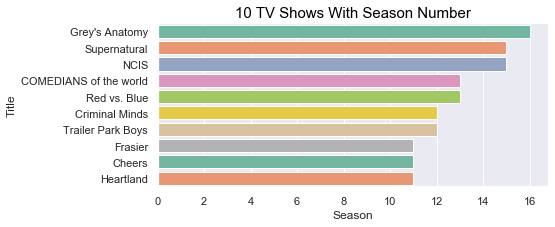

In [175]:
plt.figure(figsize=(7,3))
sns.barplot(x="Minutes",y='Title',data=Top10_Season,palette='Set2')
plt.xlabel("Season")
plt.title("10 TV Shows With Season Number",size=15,color='black')
plt.show()

In [131]:
#Country with Highest TV Shows

In [132]:
Show=Data[Data['Category'] =='TV Show']

In [133]:
Show.Country.value_counts()

United States                            705
0                                        277
United Kingdom                           204
Japan                                    157
South Korea                              147
                                        ... 
United States, Ireland                     1
United Kingdom, Finland, Germany           1
Canada, United Kingdom, United States      1
Japan, Canada                              1
Norway, Denmark                            1
Name: Country, Length: 184, dtype: int64

In [134]:
Show.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

In [135]:
#  Movies and TV Shows in each country that were released

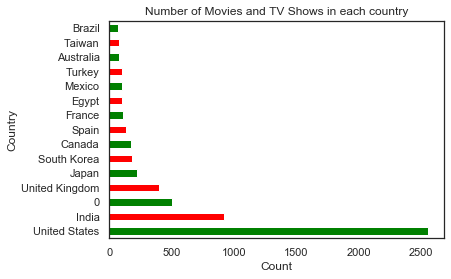

In [136]:
Data['Country'].value_counts().head(15).plot(kind='barh', color=['green', 'red'])
plt.title('Number of Movies and TV Shows in each country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [137]:
# 10 Director names With How Many Movies Released
Director=Data['Director'].value_counts().head(10)
Director

0                         2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Steven Spielberg            10
David Dhawan                 9
Name: Director, dtype: int64

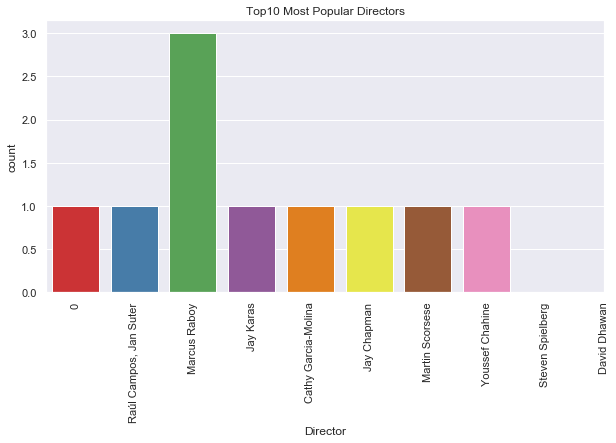

In [153]:
#Top10 Most Popular Directors
plt.figure(figsize=(10, 5))
sns.countplot(Data['Director'].value_counts().head(10),palette='Set1')
plt.title('Top10 Most Popular Directors')
plt.xticks(rotation=90)
plt.xticks(ticks=range(10), labels=Data['Director'].value_counts().head(10).index)
plt.show()

In [139]:
#  Finding Popular Cast
Data['Cast'].value_counts().head(10)

0                                                                                                                         718
David Attenborough                                                                                                         18
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Kevin Hart                                                                                                                  6
Craig Sechler                                                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Jim Gaffigan                                                                                                          

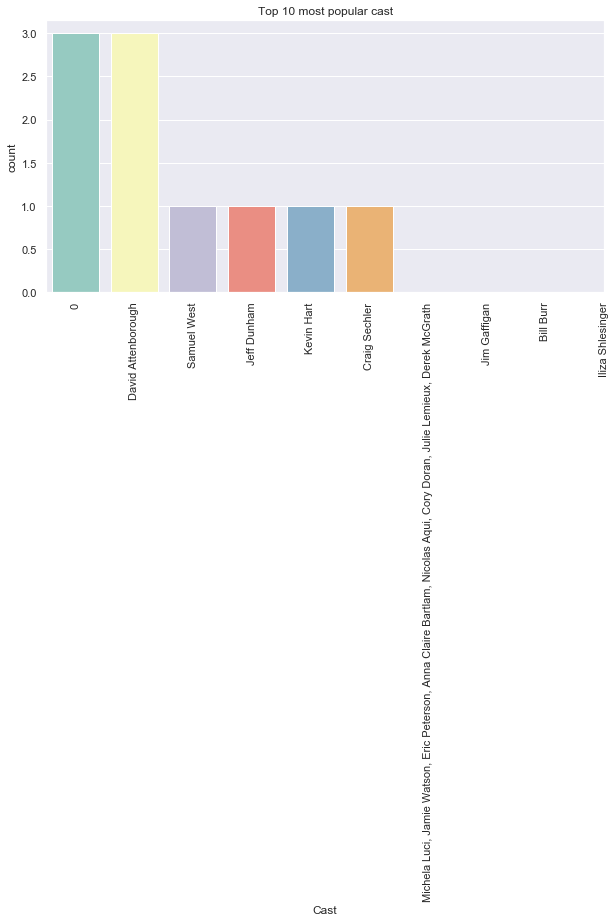

In [177]:
plt.figure(figsize=(10,5))
sns.countplot(Data['Cast'].value_counts().head(10),palette='Set3')
plt.title('Top 10 most popular cast')
plt.xticks(rotation=90)
plt.xticks(ticks=range(10), labels=Data['Cast'].value_counts().head(10).index)
plt.show()